In [8]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
file_path = r'D:\newcode\dase_introduction\hw4_data.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
nodes = data['nodes']  
edges = data['edges']  
node_names = [node[0] for node in nodes]
node_index = {name: idx for idx, name in enumerate(node_names)}
adj_matrix = [[0 for _ in range(len(nodes))] for _ in range(len(nodes))]
for edge in edges:
    user1, user2, weight = edge
    idx1, idx2 = node_index[user1], node_index[user2]
    adj_matrix[idx1][idx2] = weight
    adj_matrix[idx2][idx1] = weight 
adj_dict = {name: {} for name in node_names}
for edge in edges:
    user1, user2, weight = edge
    adj_dict[user1][user2] = weight
    adj_dict[user2][user1] = weight
direct_friends = {name: list(adj_dict[name].keys()) for name in node_names}
print("邻接矩阵:")
for row in adj_matrix:
    print(row)
print("\n邻接字典:")
for key, value in adj_dict.items():
    print(f"{key}: {value}")
print("\n每个用户的直接朋友:")
for key, value in direct_friends.items():
    print(f"{key}: {value}")
degrees = {name: len(friends) for name, friends in direct_friends.items()}
top_5_by_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n度数最多的前5个用户及其朋友数量:")
for user, degree in top_5_by_degree:
    print(f"{user}: {degree}")
influence_scores = {node[0]: node[1] for node in nodes}
top_5_by_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n影响力最高的前5个用户:")
for user, score in top_5_by_influence:
    print(f"{user}: {score}")
combined_influence = {
    name: (influence_scores[name] * 0.5 + degrees[name] * 0.5)
    for name in node_names
}
top_5_combined = sorted(combined_influence.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n综合影响力最高的前5个用户:")
for user, combined_score in top_5_combined:
    print(f"{user}: {combined_score}")
yanyan_wang_friends = direct_friends.get('Yanyan-Wang', [])
friends_of_friends = set()
for friend in yanyan_wang_friends:
    friends_of_friends.update(direct_friends[friend])
friends_of_friends.discard('Yanyan-Wang')
friends_of_friends.difference_update(yanyan_wang_friends)
common_friends_count = {}
for friend_of_friend in friends_of_friends:
    common_friends = set(direct_friends[friend_of_friend]).intersection(yanyan_wang_friends)
    common_friends_count[friend_of_friend] = len(common_friends)
top_5_recommendations = sorted(common_friends_count.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nYanyan-Wang 的‘朋友的朋友’中最有可能成为新朋友的用户:")
for user, count in top_5_recommendations:
    print(f"{user}: 共同朋友数量 {count}")
yanyan_wang_edges = []
for edge in edges:
    if 'Yanyan-Wang' in edge:
        user1, user2, weight = edge
        other_user = user2 if user1 == 'Yanyan-Wang' else user1
        yanyan_wang_edges.append((other_user, weight))
top_5_strongest_connections = sorted(yanyan_wang_edges, key=lambda x: x[1], reverse=True)[:5]
print("\n与 Yanyan-Wang 连接强度最高的5个用户:")
for user, strength in top_5_strongest_connections:
    print(f"{user}: 连接强度 {strength}")



邻接矩阵:
[0, 25.3, 25.09, 9.62, 2.1, 0, 0, 0, 0, 1.14, 0, 0, 0.86, 11.85, 7.25, 2.34, 0, 0, 0, 0, 0, 0, 4.25, 4.5, 0, 0, 3.11, 7.39, 3.61, 0, 0]
[25.3, 0, 24.84, 6.4, 0.97, 0, 0, 0, 0, 0, 0, 0, 0, 11.92, 6.58, 0, 0, 0, 0, 0, 0, 0, 4.55, 4.84, 0, 0, 3.27, 7.73, 3.82, 0, 0]
[25.09, 24.84, 0, 12.48, 3.96, 3.27, 2.52, 2.1, 0, 3.56, 1.5, 0, 4.11, 13.85, 8.1, 3.86, 2.36, 0, 1.33, 1.09, 2.24, 0, 4.66, 4.97, 0, 0, 3.32, 7.63, 3.9, 1, 2.1]
[9.62, 6.4, 12.48, 0, 11.87, 9.15, 7.73, 6.96, 6.85, 15.28, 7.93, 6.54, 9.84, 7.15, 4.1, 10.64, 7.32, 2.32, 5.19, 7.84, 5.09, 3.51, 3.21, 3.35, 4.19, 3.05, 2.51, 3.87, 2.83, 2.84, 2.96]
[2.1, 0.97, 3.96, 11.87, 0, 7.62, 5.33, 8.44, 6.84, 6.29, 9.52, 1.51, 6.4, 1.77, 0.89, 5.48, 7.29, 1.2, 6.71, 5.92, 2.84, 1.26, 0.84, 0.85, 1.34, 1.2, 0.78, 0.88, 0.81, 1.09, 0.89]
[0, 0, 3.27, 9.15, 7.62, 0, 10.82, 6.14, 3.51, 8.19, 8.83, 0, 13.32, 0, 0, 6.26, 7.06, 0.79, 4.97, 6.92, 6.19, 0, 0, 0, 0, 0, 0, 0, 0, 1.65, 3.69]
[0, 0, 2.52, 7.73, 5.33, 10.82, 0, 4.23, 3.07, 7.88, 6

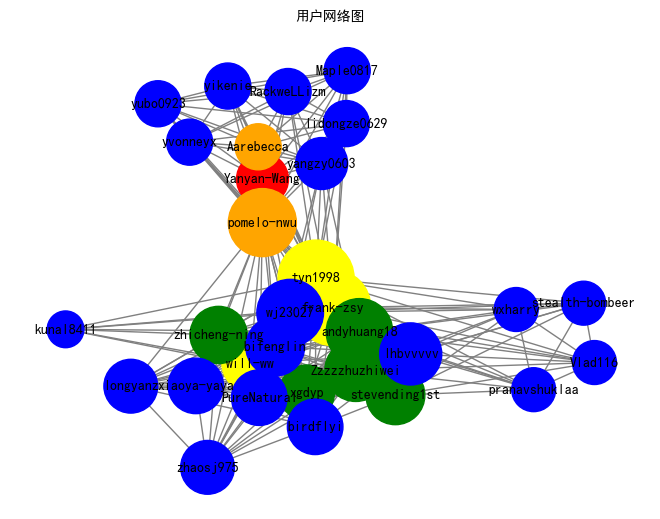

In [10]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
file_path = r'D:\newcode\dase_introduction\hw4_data.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
nodes = data['nodes']
edges = data['edges']
G = nx.Graph()
for node in nodes:
    user, influence = node
    G.add_node(user, influence=influence)
for edge in edges:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)
degrees = dict(G.degree())
for node in G.nodes:
    G.nodes[node]['size'] = degrees[node] * 100
node_colors = []
for node in G.nodes:
    influence = G.nodes[node]['influence']
    if influence >= 30:
        color = 'red'
    elif 20 <= influence < 30:
        color = 'orange'
    elif 10 <= influence < 20:
        color = 'yellow'
    elif 5 <= influence < 10:
        color = 'green'
    else:
        color = 'blue'
    node_colors.append(color)
font = FontProperties(family='SimHei', size=10)
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=False, node_size=[G.nodes[node]['size'] for node in G.nodes], node_color=node_colors, edge_color='gray')
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=10, ha='center', va='center', fontproperties=font)
plt.title('用户网络图', fontproperties=font)
plt.show()

In [ ]:
#节点影响力:红色>橙色>黄色>绿色 可以根据节点的颜色判断 或者根据节点周围的边是否密来判断